# IMPORTS

In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import f1_score
from scipy.special import softmax

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# PORT PREDICTION
- Load the model and baseline predictions
- Process each and get the results

In [2]:
results = pd.read_csv('port_prediction_results.csv')
baseline = pd.read_csv('BASELINE_port_prediction_results.csv')

(0.0, 1.0)

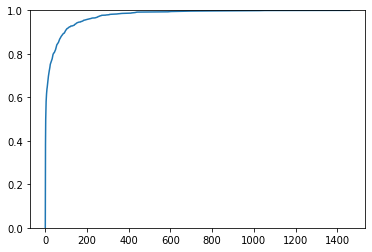

In [3]:
ranks = results[results['target'] == 1]

ranks['count'] = 1/len(ranks)
ranks = ranks.sort_values('rank')

ranks['cumsum'] = ranks['count'].cumsum()
ranks = pd.pivot_table(ranks, values='cumsum', index='rank', aggfunc='max').reset_index()

ranks = ranks.append({'rank':0, 'cumsum':0}, ignore_index=True).sort_values('rank', ascending=True).reset_index(drop=True)

plt.plot(ranks['rank'], ranks['cumsum'])
plt.ylim(0, 1)

In [4]:
ranks.head(15)

,rank,cumsum
0,0,0.000000
1,1,0.384000
2,2,0.498667
3,3,0.550000
4,4,0.581333
5,5,0.601333
6,6,0.616000
7,7,0.628667
8,8,0.638667
9,9,0.644667


In [5]:
ports = pd.read_parquet('ports_prep.parquet.gzip').set_index('port_index')
info = pd.merge(results, ports[['portname', 'port_lat', 'port_long']],
        how='left', left_on='port_index', right_index=True)

ports.columns = ['target_' + column for column in ports.columns]
info = pd.merge(info, ports[['target_portname', 'target_port_lat', 'target_port_long']],
        how='left', left_on='target_port_index', right_index=True)

info = info[['identifier', 'portname', 'port_lat', 'port_long',
             'target_portname', 'target_port_lat', 'target_port_long', 
             'rank', 'prediction', 'target']]

info['probability'] = info.groupby('identifier')['prediction'].apply(lambda x: softmax(x))

info.groupby('identifier').head(5).head(25)

,identifier,portname,port_lat,port_long,target_portname,target_port_lat,target_port_long,rank,prediction,target,probability
0,512445000_3,Picton,-41.2936,174.007,Wellington,-41.3202,174.807,1,3.712646,1.0,0.970393
1,512445000_3,Picton,-41.2936,174.007,Port Taranaki,-39.0609,174.027,2,-1.624895,0.0,0.004665
2,512445000_3,Picton,-41.2936,174.007,Nelson,-41.2845,173.237,3,-2.440895,0.0,0.002063
3,512445000_3,Picton,-41.2936,174.007,Gisborne,-38.6759,177.989,4,-2.486069,0.0,0.001972
4,512445000_3,Picton,-41.2936,174.007,Auckland,-36.8653,174.790,5,-2.518690,0.0,0.001909
1601,512445000_6,Picton,-41.2936,174.007,Wellington,-41.3202,174.807,1,3.709972,1.0,0.969663
1602,512445000_6,Picton,-41.2936,174.007,Port Taranaki,-39.0609,174.027,2,-1.640135,0.0,0.004604
1603,512445000_6,Picton,-41.2936,174.007,Auckland,-36.8653,174.790,3,-2.437718,0.0,0.002074
1604,512445000_6,Picton,-41.2936,174.007,Gisborne,-38.6759,177.989,4,-2.437733,0.0,0.002074
1605,512445000_6,Picton,-41.2936,174.007,Nelson,-41.2845,173.237,5,-2.443569,0.0,0.002061


In [6]:
predicted = info[info['rank']==1][['identifier', 'target_portname', 'target_port_lat', 'target_port_long', 'probability']]
predicted = predicted.set_index('identifier')
predicted.columns = ['pred_'+ col[len('target_'):] for col in predicted.columns]


true = info[info['target']==1][['identifier', 'target_portname', 'target_port_lat', 'target_port_long', 'probability']]
true = true.set_index('identifier')


adf = pd.merge(true, predicted, how='left', left_index=True, right_index=True)
adf.drop('probability', 1, inplace=True)
adf.rename(columns={'pred_lity': 'probability'}, inplace=True)

adf['distance'] = np.sqrt((adf['target_port_lat'] - adf['pred_port_lat'])**2 + 
                                 (adf['target_port_long'] - adf['pred_port_long'])**2) *111

adf.head()

,target_portname,target_port_lat,target_port_long,pred_portname,pred_port_lat,pred_port_long,probability,distance
identifier,,,,,,,,
512445000_3,Wellington,-41.3202,174.807,Wellington,-41.3202,174.807,0.970393,0.0
512445000_6,Wellington,-41.3202,174.807,Wellington,-41.3202,174.807,0.969663,0.0
512445000_7,Wellington,-41.3202,174.807,Wellington,-41.3202,174.807,0.979015,0.0
512445000_8,Picton,-41.2936,174.007,Picton,-41.2936,174.007,0.947974,0.0
512445000_9,Picton,-41.2936,174.007,Picton,-41.2936,174.007,0.950097,0.0


In [7]:
f1_score(adf['target_portname'], 
         adf['pred_portname'],
         average='macro')

0.12652772965620396

In [8]:
adf['distance'].describe()

count     1500.000000
mean      2211.537725
std       4422.057264
min          0.000000
25%          0.000000
50%         20.217793
75%       2587.306780
max      29273.717018
Name: distance, dtype: float64

In [9]:
adf[adf['probability'] > 0.3]['distance'].describe()

count      577.000000
mean       208.131912
std       1741.302551
min          0.000000
25%          0.000000
50%          0.000000
75%          1.546051
max      27079.674095
Name: distance, dtype: float64

In [10]:
len(adf[adf['distance'] < 100]) / len(adf)

0.542

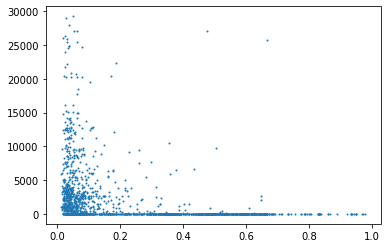

In [11]:
plt.plot(adf['probability'], adf['distance'], 'o', markersize=1)

### Baseline

(0.0, 1.0)

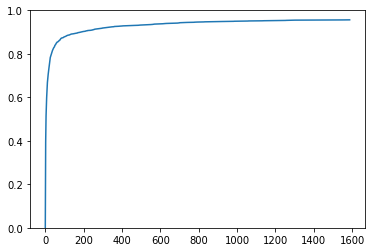

In [12]:
baseline_plot = baseline[baseline['target'] == 1][['identifier', 'port_index', 'target_port_index', 'rank']]

no_target = 1 - (len(baseline[baseline['target'] == 1]) / baseline['identifier'].nunique())

baseline_plot['count'] = 1/len(baseline_plot)
baseline_plot = baseline_plot.sort_values('rank')
baseline_plot['cumsum'] = baseline_plot['count'].cumsum()

baseline_plot = pd.pivot_table(baseline_plot, values='cumsum', index='rank', aggfunc='max').reset_index()
baseline_plot['cumsum'] = baseline_plot['cumsum'] * (1-no_target)
baseline_plot = baseline_plot.append({'rank':0, 'cumsum':0}, ignore_index=True).sort_values('rank', ascending=True).reset_index(drop=True)

plt.plot(baseline_plot['rank'], baseline_plot['cumsum'])
plt.ylim(0, 1)

In [13]:
baseline_plot.head(15)

,rank,cumsum
0,0,0.000000
1,1,0.275034
2,2,0.395129
3,3,0.466847
4,4,0.514208
5,5,0.548038
6,6,0.575101
7,7,0.597429
8,8,0.617727
9,9,0.631597


In [14]:
ports = pd.read_parquet('ports_prep.parquet.gzip').set_index('port_index')
baseline_info = pd.merge(baseline, ports[['portname', 'port_lat', 'port_long']],
        how='left', left_on='port_index', right_index=True)

ports.columns = ['target_' + column for column in ports.columns]
baseline_info = pd.merge(baseline_info, ports[['target_portname', 'target_port_lat', 'target_port_long']],
        how='left', left_on='target_port_index', right_index=True)

baseline_info = baseline_info[['identifier', 'portname', 'port_lat', 'port_long',
             'target_portname', 'target_port_lat', 'target_port_long', 
             'rank', 'target']]

baseline_info.groupby('identifier').head(5).head(25)

,identifier,portname,port_lat,port_long,target_portname,target_port_lat,target_port_long,rank,target
0,512445000_3,Picton,-41.2936,174.0070,Wellington,-41.32020,174.8070,1,1.0
1,512445000_3,Picton,-41.2936,174.0070,Mount Maunganui,-37.63820,176.1760,2,0.0
2,512445000_3,Picton,-41.2936,174.0070,Nelson,-41.28450,173.2370,3,0.0
3,512445000_3,Picton,-41.2936,174.0070,Botany Bay,-33.94930,151.1820,4,0.0
4,512445000_3,Picton,-41.2936,174.0070,Napier,-39.48120,176.8920,5,0.0
21,518100004_0,Yuzhnyy,46.6188,31.0142,Odessa,46.49370,30.7547,1,1.0
22,518100004_0,Yuzhnyy,46.6188,31.0142,Yuzhnyy,46.61880,31.0142,2,0.0
23,518100004_0,Yuzhnyy,46.6188,31.0142,Tanjong Pagar,1.26503,103.8390,3,0.0
24,518100004_0,Yuzhnyy,46.6188,31.0142,Novorossiysk,44.71350,37.7883,4,0.0
25,518100004_0,Yuzhnyy,46.6188,31.0142,Constanta,44.16450,28.6419,5,0.0


In [15]:
predicted = baseline_info[baseline_info['rank']==1][['identifier', 'target_portname', 
                                                     'target_port_lat', 'target_port_long']]
predicted = predicted.set_index('identifier')
predicted.columns = ['pred_'+ col[len('target_'):] for col in predicted.columns]


true = baseline_info[baseline_info['target']==1][['identifier', 'target_portname', 'target_port_lat', 
                                                  'target_port_long']]
true = true.set_index('identifier')


baseline_adf = pd.merge(true, predicted, how='left', left_index=True, right_index=True)


baseline_adf['distance'] = np.sqrt((baseline_adf['target_port_lat'] - baseline_adf['pred_port_lat'])**2 + 
                                 (baseline_adf['target_port_long'] - baseline_adf['pred_port_long'])**2) *111

baseline_adf.head()

,target_portname,target_port_lat,target_port_long,pred_portname,pred_port_lat,pred_port_long,distance
identifier,,,,,,,
512445000_3,Wellington,-41.3202,174.8070,Wellington,-41.3202,174.8070,0.000000
518100004_0,Odessa,46.4937,30.7547,Odessa,46.4937,30.7547,0.000000
518100160_0,Amalfi,40.6439,14.6183,Portici,40.8367,14.2587,45.290721
518100163_0,Constanta,44.1645,28.6419,Novorossiysk,44.7135,37.7883,1017.077645
518100165_0,Novorossiysk,44.7135,37.7883,Constanta,44.1645,28.6419,1017.077645


In [16]:
f1_score(baseline_adf['target_portname'], 
         baseline_adf['pred_portname'],
         average='macro')

0.08738638493742953

In [17]:
baseline_adf['distance'].describe()

count     2827.000000
mean      1848.755214
std       3930.730180
min          0.000000
25%          0.000000
50%        156.943795
75%       1849.089386
max      29135.458851
Name: distance, dtype: float64

In [18]:
len(baseline_adf[baseline_adf['distance'] < 100]) / len(baseline_adf)

0.48036788114609125

## plot

In [19]:
plotdata = pd.merge(ranks.rename(columns={'cumsum': 'Model'}), 
                    baseline_plot.rename(columns={'cumsum': 'Baseline'}), how='outer', on='rank')

plotdata = plotdata.sort_values('rank').fillna(method='pad')
plotdata = plotdata.head(100)

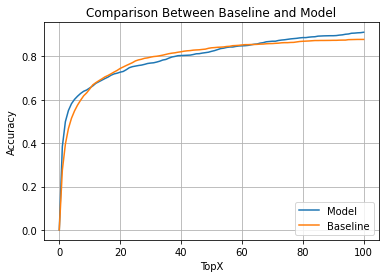

In [20]:
plt.plot(plotdata['rank'].values, plotdata['Model'].values, label='Model')
plt.plot(plotdata['rank'].values, plotdata['Baseline'].values, label='Baseline')

plt.xlabel('TopX')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid()
plt.title('Comparison Between Baseline and Model')
plt.show()

In [21]:
adf = adf.sort_values('distance')
baseline_adf = baseline_adf.sort_values('distance')

adf['weight'] = 1 / len(adf)
baseline_adf['weight'] = 1 / len(baseline_adf)

adf['cumsum'] = adf['weight'].cumsum()
baseline_adf['cumsum'] = baseline_adf['weight'].cumsum()

adf = adf.iloc[576:] # to make sure the graph starts at 38.4%
baseline_adf = baseline_adf.iloc[813:] # to make sure the graph starts at 

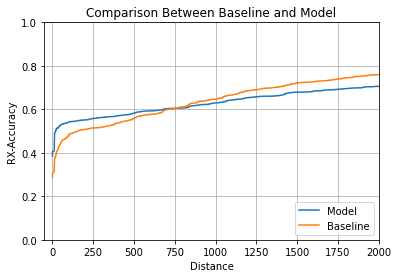

In [22]:
plt.plot(adf['distance'].values, adf['cumsum'].values, label='Model')
plt.plot(baseline_adf['distance'].values, baseline_adf['cumsum'].values, label='Baseline')

plt.xlabel('Distance')
plt.ylabel('RX-Accuracy')
plt.xlim(-50, 2000)
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.grid()
plt.title('Comparison Between Baseline and Model')
plt.show()

# TRAVEL DURATION
- Load the model and baseline predictions
- Process each and get the results

In [23]:
results = pd.read_csv('travel_prediction.csv')
baseline = pd.read_csv('BASELINE_travel_prediction.csv')

In [24]:
def MAPE(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred) / y_true)

### Model

In [25]:
results['error'] = results['target_travel_duration'] - results['prediction']
results['abs_error'] = np.abs(results['target_travel_duration'] - results['prediction'])
results['MAPE'] = results['abs_error'] / results['target_travel_duration']

MAPE (test): 0.7693170209689719
RMSE (test): 94.08367090826836

[[1.         0.77532383]
 [0.77532383 1.        ]]



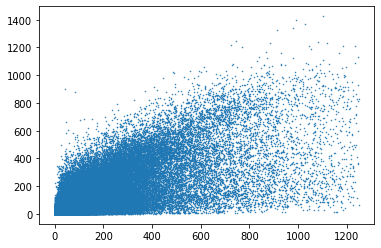

In [26]:
print('MAPE (test):', MAPE(results['target_travel_duration'], results['prediction']))
print('RMSE (test):', np.sqrt(mse(results['target_travel_duration'], results['prediction'])))
print()

print(np.corrcoef(results['target_travel_duration'], results['prediction']))
print()

plt.plot(results['target_travel_duration'], results['prediction'], 'o', markersize=0.5)

In [27]:
count = 0
percentage = .5

for i,j in zip(results['abs_error'].values, results['target_travel_duration'].values):
    if (i>(percentage*j)):
        count += 1

print(100 - (100*count/len(results['abs_error'].values)))

53.06240757753661


### Baseline

In [28]:
baseline['prediction'] = np.exp(baseline['prediction']).fillna(baseline['prediction'].mean())
baseline['target_travel_duration'] = np.exp(baseline['target_travel_duration'])

baseline['error'] = baseline['target_travel_duration'] - baseline['prediction']
baseline['abs_error'] = np.abs(baseline['target_travel_duration'] - baseline['prediction'])
baseline['MAPE'] = baseline['abs_error'] / baseline['target_travel_duration']

MAPE (test): 0.9796685296074293
RMSE (test): 117.9205901715208

[[1.         0.63188458]
 [0.63188458 1.        ]]



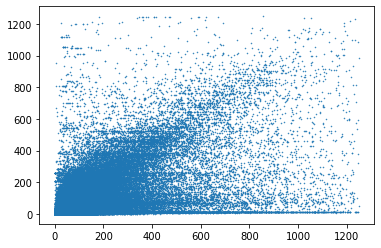

In [29]:
print('MAPE (test):', MAPE(baseline['target_travel_duration'], baseline['prediction']))
print('RMSE (test):', np.sqrt(mse(baseline['target_travel_duration'], baseline['prediction'])))
print()

print(np.corrcoef(baseline['target_travel_duration'], baseline['prediction']))
print()

plt.plot(baseline['target_travel_duration'], baseline['prediction'], 'o', markersize=0.5)

In [30]:
count = 0
percentage = .5

for i,j in zip(baseline['abs_error'].values, baseline['target_travel_duration'].values):
    if (i>(percentage*j)):
        count += 1

print(100 - (100*count/len(baseline['abs_error'].values)))

42.27188539368899


### Plot

In [31]:
bins = [1, 3, 6, 12, 24, 48, 96, 168, 336, 772]

model_dict = {'MAPE': [],
         'RMSE': []}
prev_bin = 0
for bin_ in bins:
    data = results[(results['target_travel_duration'] < bin_)]
    model_dict['MAPE'].append(MAPE(data['target_travel_duration'], data['prediction']))
    model_dict['RMSE'].append(np.sqrt(mse(data['target_travel_duration'], data['prediction'])))
    prev_bin = bin_    
    
    
baseline_dict = {'MAPE': [],
         'RMSE': []}
prev_bin = 0
for bin_ in bins:
    data = baseline[(baseline['target_travel_duration'] < bin_)]
    baseline_dict['MAPE'].append(MAPE(data['target_travel_duration'], data['prediction']))
    baseline_dict['RMSE'].append(np.sqrt(mse(data['target_travel_duration'], data['prediction'])))
    prev_bin = bin_
    

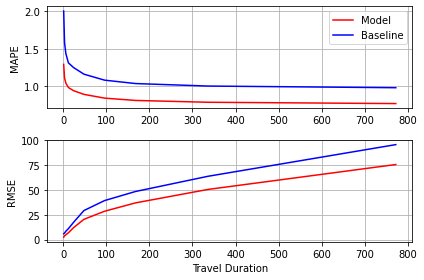

In [32]:
fig, ax = plt.subplots(nrows=2,ncols=1)

plt.subplot(2,1,1)
plt.ylabel('MAPE')
plt.plot(bins, model_dict['MAPE'], color='red', label='Model')
plt.plot(bins, baseline_dict['MAPE'], color='blue', label='Baseline')
plt.tick_params(axis='y')
plt.grid()
plt.legend()

plt.subplot(2,1,2)
plt.xlabel('Travel Duration')
plt.ylabel('RMSE') 
plt.plot(bins, model_dict['RMSE'], color='red', label='Model')
plt.plot(bins, baseline_dict['RMSE'], color='blue', label='Baseline')
plt.tick_params(axis='y')

fig.tight_layout()
plt.grid()
plt.show()

# STAY DURATION
- Load the model and baseline predictions
- Process each and get the results

In [33]:
results = pd.read_csv('stay_prediction.csv')
baseline = pd.read_csv('BASELINE_stay_prediction.csv')

In [34]:
def MAPE(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred) / y_true)

### Model

In [35]:
results['error'] = results['target_stay_duration'] - results['prediction']
results['abs_error'] = np.abs(results['target_stay_duration'] - results['prediction'])
results['MAPE'] = results['abs_error'] / results['target_stay_duration']

MAPE (test): 2.1514432881584042
RMSE (test): 101.42350441699784

[[1.         0.38060681]
 [0.38060681 1.        ]]



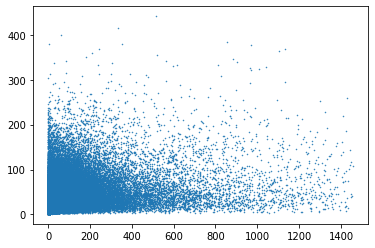

In [36]:
print('MAPE (test):', MAPE(results['target_stay_duration'], results['prediction']))
print('RMSE (test):', np.sqrt(mse(results['target_stay_duration'], results['prediction'])))
print()

print(np.corrcoef(results['target_stay_duration'], results['prediction']))
print()

plt.plot(results['target_stay_duration'], results['prediction'], 'o', markersize=0.5)

In [37]:
count = 0
percentage = .5

for i,j in zip(results['abs_error'].values, results['target_stay_duration'].values):
    if (i>(percentage*j)):
        count += 1

print(100 - (100*count/len(results['abs_error'].values)))

45.88237703449229


### Baseline

In [38]:
baseline['prediction'] = np.exp(baseline['prediction']).fillna(baseline['prediction'].mean())
baseline['target_stay_duration'] = np.exp(baseline['target_stay_duration'])

baseline['error'] = baseline['target_stay_duration'] - baseline['prediction']
baseline['abs_error'] = np.abs(baseline['target_stay_duration'] - baseline['prediction'])
baseline['MAPE'] = baseline['abs_error'] / baseline['target_stay_duration']

In [39]:
baseline.describe()

,port_index,target_port_index,target_stay_duration,prediction,error,abs_error,MAPE
count,195319.000000,195319.000000,195319.000000,195319.000000,195319.000000,195319.000000,1.953190e+05
mean,1665.428863,1663.023198,47.091011,26.357628,20.733383,38.263777,2.384070e+00
std,981.104498,977.398297,106.362343,35.675139,106.491469,101.519378,1.303737e+01
min,5.000000,5.000000,0.500278,0.550000,-1393.105278,0.000007,6.206440e-07
25%,843.000000,843.000000,6.933611,12.326236,-9.706607,4.412284,3.010165e-01
50%,1608.000000,1608.000000,17.000833,18.934963,-1.414884,10.965764,6.414725e-01
75%,2478.000000,2478.000000,41.134583,30.015948,14.548724,27.729870,1.234033e+00
max,3568.000000,3568.000000,1455.991944,1441.965556,1435.703376,1435.703376,2.764707e+03


MAPE (test): 2.3840697354608014
RMSE (test): 108.4907741949498

[[1.         0.16408399]
 [0.16408399 1.        ]]



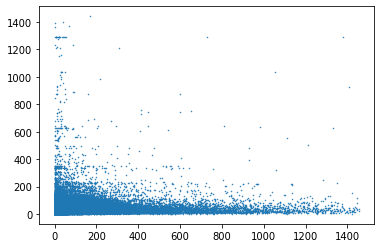

In [40]:
print('MAPE (test):', MAPE(baseline['target_stay_duration'], baseline['prediction']))
print('RMSE (test):', np.sqrt(mse(baseline['target_stay_duration'], baseline['prediction'])))
print()

print(np.corrcoef(baseline['target_stay_duration'], baseline['prediction']))
print()

plt.plot(baseline['target_stay_duration'], baseline['prediction'], 'o', markersize=0.5)

In [41]:
count = 0
percentage = .5

for i,j in zip(baseline['abs_error'].values, baseline['target_stay_duration'].values):
    if (i>(percentage*j)):
        count += 1

print(100 - (100*count/len(baseline['abs_error'].values)))

40.05293903818881


### Plot

In [42]:
results['prediction'].describe()

count    195319.000000
mean         27.090733
std          25.900399
min           1.106529
25%          11.019235
50%          19.651612
75%          34.074206
max         441.493171
Name: prediction, dtype: float64

In [43]:
bins = [1, 2, 6, 12, 24, 48, 96, 168, 336]

model_dict = {'MAPE': [],
         'RMSE': []}
prev_bin = 0
for bin_ in bins:
    data = results[(results['target_stay_duration'] < bin_)]
    model_dict['MAPE'].append(MAPE(data['target_stay_duration'], data['prediction']))
    model_dict['RMSE'].append(np.sqrt(mse(data['target_stay_duration'], data['prediction'])))
    prev_bin = bin_    
    
    
baseline_dict = {'MAPE': [],
         'RMSE': []}
prev_bin = 0
for bin_ in bins:
    data = baseline[(baseline['target_stay_duration'] < bin_)]
    baseline_dict['MAPE'].append(MAPE(data['target_stay_duration'], data['prediction']))
    baseline_dict['RMSE'].append(np.sqrt(mse(data['target_stay_duration'], data['prediction'])))
    prev_bin = bin_
    

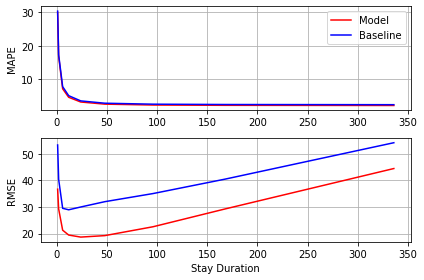

In [44]:
fig, ax = plt.subplots(nrows=2,ncols=1)

plt.subplot(2,1,1)
plt.ylabel('MAPE')
plt.plot(bins, model_dict['MAPE'], color='red', label='Model')
plt.plot(bins, baseline_dict['MAPE'], color='blue', label='Baseline')
plt.tick_params(axis='y')
plt.grid()
plt.legend()

plt.subplot(2,1,2)
plt.xlabel('Stay Duration')
plt.ylabel('RMSE') 
plt.plot(bins, model_dict['RMSE'], color='red', label='Model')
plt.plot(bins, baseline_dict['RMSE'], color='blue', label='Baseline')
plt.tick_params(axis='y')

fig.tight_layout()
plt.grid()
plt.show()

In [45]:
results['target_stay_duration'].describe()

count    195319.000000
mean         47.091011
std         106.362343
min           0.500278
25%           6.933611
50%          17.000833
75%          41.134583
max        1455.991944
Name: target_stay_duration, dtype: float64